In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf #pip install yfinance
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from arch.unitroot import ADF
from sklearn.metrics import r2_score
import pymannkendall as mk

We are going to address how we can deternine the trend in time series. firstly we need to know trend structures can be linear,
exponential, logoratmic or polynomial

In [6]:
exchange_rate = yf.download("USDTRY=X", period="5Y", interval="1mo")
exchange_rate.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-01,6.04221,6.22382,5.46400,5.48090,5.48090,0
2018-11-01,5.57903,5.64220,5.13438,5.17020,5.17020,0
2018-12-01,5.16588,5.44988,5.14312,5.27428,5.27428,0
2019-01-01,5.28730,5.57180,5.16294,5.22741,5.22741,0
2019-02-01,5.18030,5.34130,5.17633,5.30937,5.30937,0


In [7]:
df = pd.DataFrame(exchange_rate["Close"])
df.head()

,Close
Date,
2018-10-01,5.48090
2018-11-01,5.17020
2018-12-01,5.27428
2019-01-01,5.22741
2019-02-01,5.30937


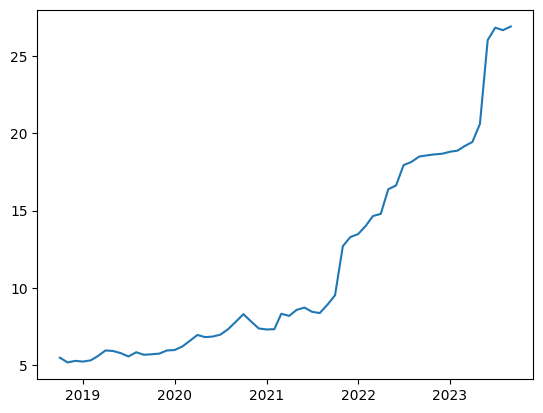

In [8]:
# Let's see the graph trend and that it has a polynomial structure
plt.plot(df)
plt.show()


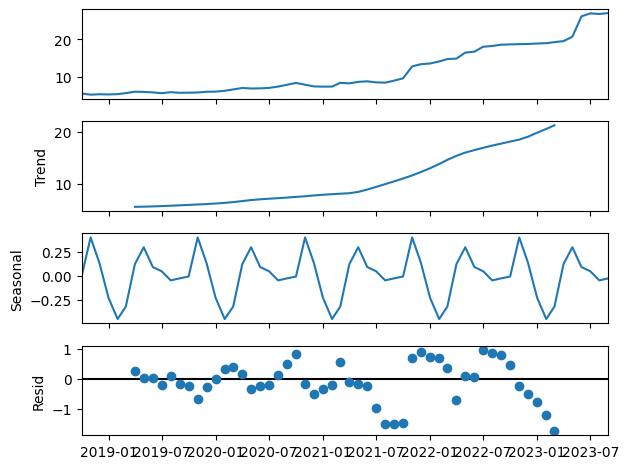

In [9]:
# We need to be sure if there is trend structure that we can not see at a first glance like above graph.
s = seasonal_decompose(df)
s.plot()
plt.show()

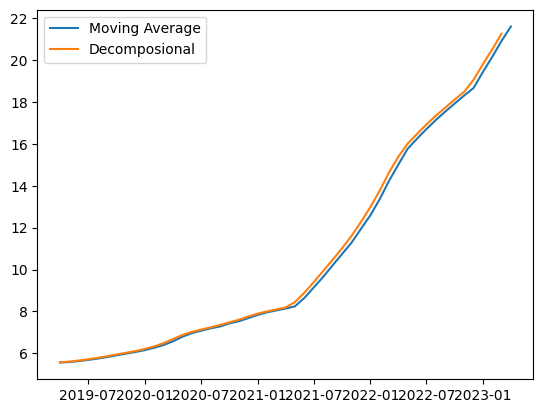

In [10]:
# Comparison of moving average method and decompositional method
moving_average = df.rolling(12, center=True).mean() # monthly average for 12 months
trend_structure = s.trend

plt.plot(moving_average, label="Moving Average")
plt.plot(trend_structure, label="Decomposional")
plt.legend()
plt.show()

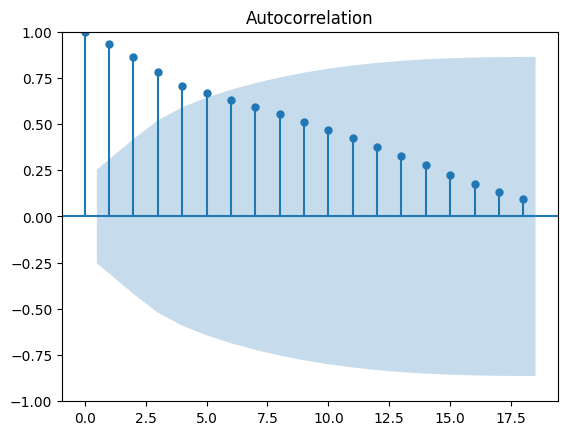

In [11]:
# Autocorrelation method for detecting trend structure. If there is a gradually decreasing structure in the graph then we can say there is a trend.
plot_acf(df)
plt.show()

In [12]:
# The another way to determine trend is to chech if there is a unitroot. As we can see p_value is nearly 1 so there is a trend structure.
# Here we can not reject null hypothesis
stationary = ADF(df)
print(stationary)

   Augmented Dickey-Fuller Results   
Test Statistic                  2.105
P-value                         0.999
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.55 (1%), -2.91 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


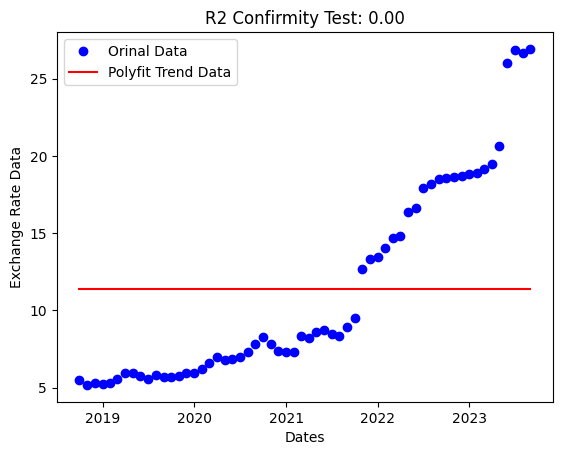

In [13]:
# The other method that is called polyfit that indicates how much explanatory power it has
x = np.arange(len(df))
y = df["Close"]

#to observe how well it has conformity to the polynomial structure 
coefficient = np.polyfit(x, y, 0) #if we assume data has linear regression we take 0 for degree equation
pol_func = np.poly1d(coefficient)
trend = pol_func(x)
r2 = r2_score(y,trend)

plt.plot(df.index, y, "bo", label="Orinal Data")
plt.plot(df.index, trend, "r-", label="Polyfit Trend Data")
plt.xlabel("Dates")
plt.ylabel("Exchange Rate Data")
plt.legend()
plt.title(f"R2 Confirmity Test: {r2:.2f}")
plt.show()

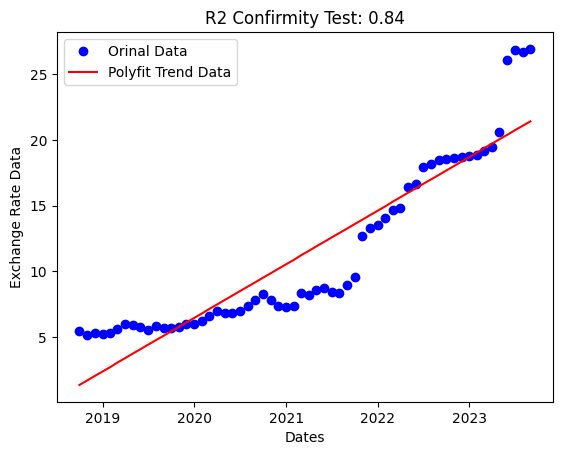

In [14]:
coefficient = np.polyfit(x, y, 1) #first degree equation
pol_func = np.poly1d(coefficient)
trend = pol_func(x)
r2 = r2_score(y,trend)

plt.plot(df.index, y, "bo", label="Orinal Data")
plt.plot(df.index, trend, "r-", label="Polyfit Trend Data")
plt.xlabel("Dates")
plt.ylabel("Exchange Rate Data")
plt.legend()
plt.title(f"R2 Confirmity Test: {r2:.2f}")
plt.show()

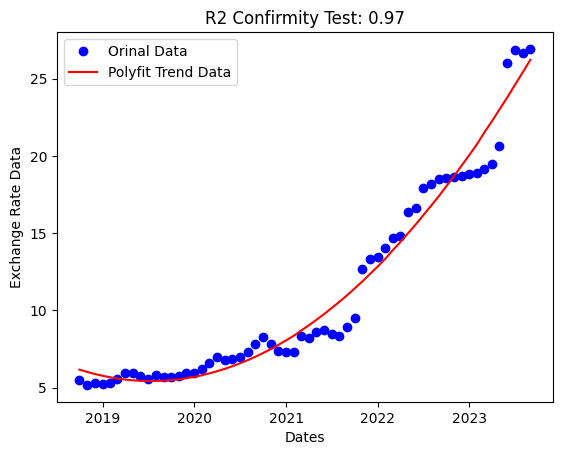

In [15]:
coefficient = np.polyfit(x, y, 2) #second degree equation
pol_func = np.poly1d(coefficient)
trend = pol_func(x)
r2 = r2_score(y,trend)

plt.plot(df.index, y, "bo", label="Orinal Data")
plt.plot(df.index, trend, "r-", label="Polyfit Trend Data")
plt.xlabel("Dates")
plt.ylabel("Exchange Rate Data")
plt.legend()
plt.title(f"R2 Confirmity Test: {r2:.2f}")
plt.show()

As we observe 3 graphs above we can see our data has polynomial regression. That is why we got higher r2 score for second degree equation.

In [16]:
# The last method that I am going to address is Mann-Kendall statistical test to determine there is a trend or not.
# It is genarelly preffered. In this test H0: There is a trend, H1: There is not a trend
mkt = mk.original_test(df)
print(mkt)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=10.632006045068488, Tau=0.9423728813559322, s=1668.0, var_s=24583.333333333332, slope=0.3060166947240752, intercept=-0.7161721894896136)


As we see in Mann_Kendall_Test there is an increasing test and p_value < 0.05 so we reject the H0 hypothesis and we are able to say there is a trend in the series.

In [17]:
# We can firstly decompose trend from seasonality and residuals then apply the mann-kendall test
s = seasonal_decompose(df)
trend = s.trend

mkt = mk.original_test(trend)
print(mkt)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=10.016821484913653, Tau=1.0, s=1128.0, var_s=12658.666666666666, slope=0.3256538692447874, intercept=-1.4655339229438038)
